# Task
predict insurance premiums based on various factors.

Here is all the data you need:
"sample_submission.csv"
"test.csv"
"train.csv"

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the three CSV files into pandas DataFrames.



In [1]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

display(df_train.head())
display(df_test.head())
display(df_submission.head())

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0         372.0                 5.0  2023-12-23 15:21:39.134960   
1         12.0         694.0                 2.0  2023-06-12 15:21:39.111551   
2         14.0           NaN                 3.0  2023-09-30 15:21:39.221386   
3          0.0         367.0                 1.0  2024-06-12 15:21:39.226954   
4          8.0         598.0                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              NaN         19.0           NaN                 1.0   
1              NaN         14.0         372.0                 8.0   
2              NaN         16.0         819.0                 9.0   
3              1.0          3.0         770.0                 5.0   
4              NaN         14.0         755.0                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

id  Premium Amount
0  1200000        1102.545
1  1200001        1102.545
2  1200002        1102.545
3  1200003        1102.545
4  1200004        1102.545

## Data exploration

### Subtask:
Explore the training dataset (`df_train`) to understand its characteristics.


**Reasoning**:
Explore the training dataset (`df_train`) by examining its shape, data types, descriptive statistics, missing values, and data distributions of numerical and categorical features.  This will provide initial insights into the data's characteristics, potential outliers, and relationships between variables.



Shape of df_train: (1200000, 21)

Info of df_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-n

None


Descriptive Statistics of Numerical Features:


id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.000000e+00  3.000000e+02   
25%    1.591896e+01         0.000000  5.000000e+00  4.680000e+02   
50%    2.457865e+01         1.000000  1.000000e+01  5.950000e+02   
75%    3.452721e+01         2.000000  1.500000e+01  7.210000e+02   
max    5.897591e+01         9.000000  1.900000e+01  8.490000e+02   

       Insurance Duration  Premium Amount  
count        1.199999e+06    1.200000e+06  
mean         5.018219e+00    1.102545e+03  
std          2.594331e+00    8.649989e+02  
min          1.000000e+00    2.000000e+01  
25%          3.000000e+00    5.140000e+02  
50%          5.000000e+00    8.720000e+02  
75%          7.000000e+00    1.509000e+03  
max          9.000000e+00    4.999000e+03


Missing Values:


Missing Values  Percentage
id                                 0    0.000000
Age                            18705    1.558750
Gender                             0    0.000000
Annual Income                  44949    3.745750
Marital Status                 18529    1.544083
Number of Dependents          109672    9.139333
Education Level                    0    0.000000
Occupation                    358075   29.839583
Health Score                   74076    6.173000
Location                           0    0.000000
Policy Type                        0    0.000000
Previous Claims               364029   30.335750
Vehicle Age                        6    0.000500
Credit Score                  137882   11.490167
Insurance Duration                 1    0.000083
Policy Start Date                  0    0.000000
Customer Feedback              77824    6.485333
Smoking Status                     0    0.000000
Exercise Frequency                 0    0.000000
Property Type                      0    0.000000
Premium Amount                     0    0.000000

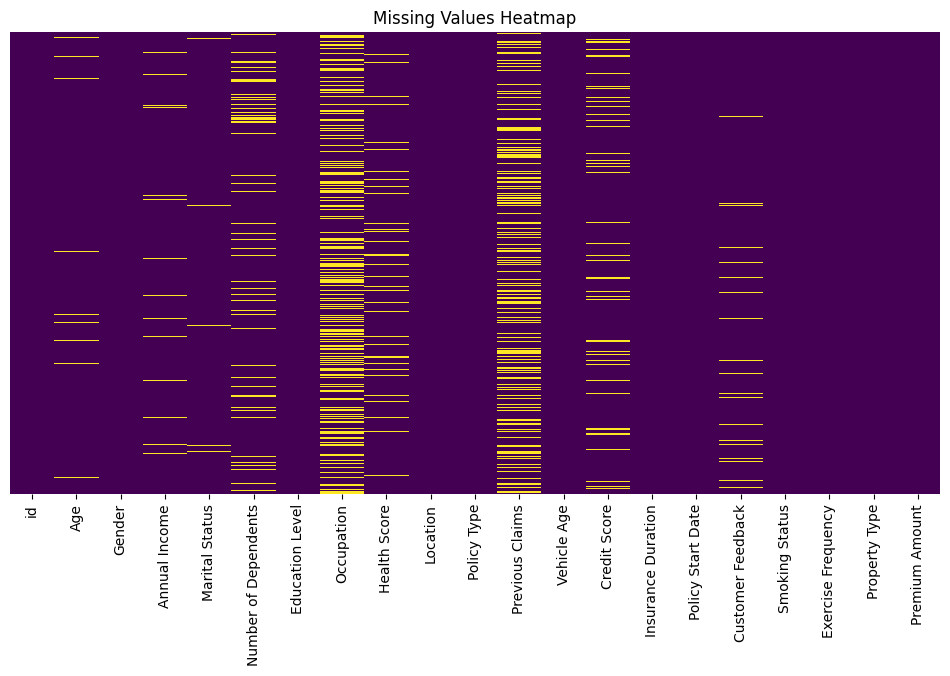

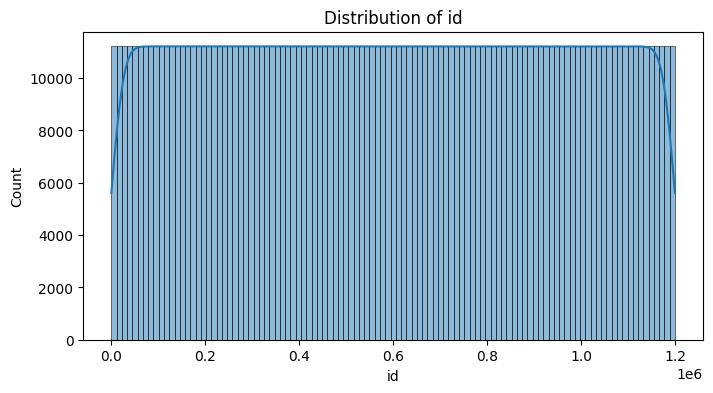

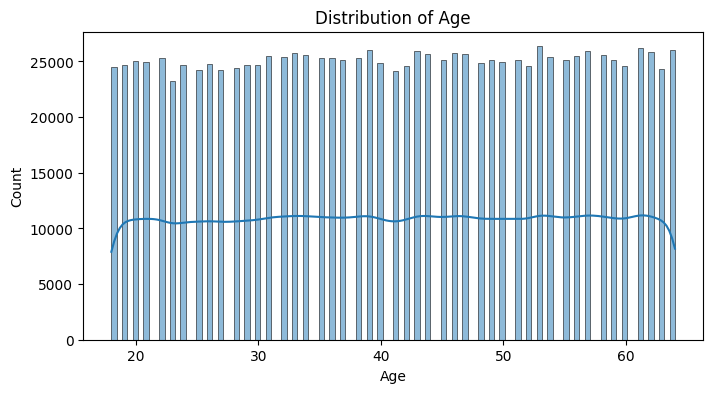

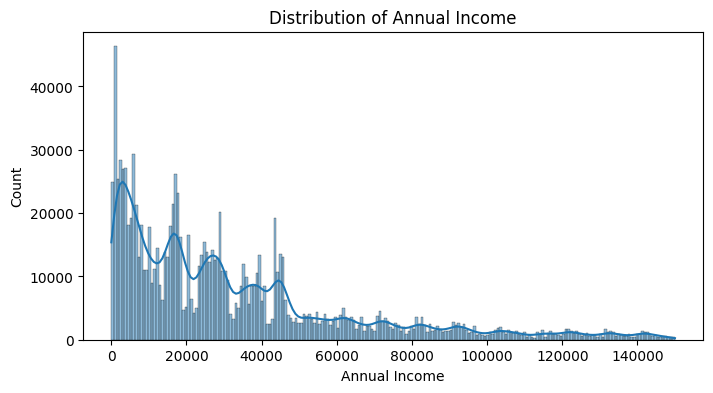

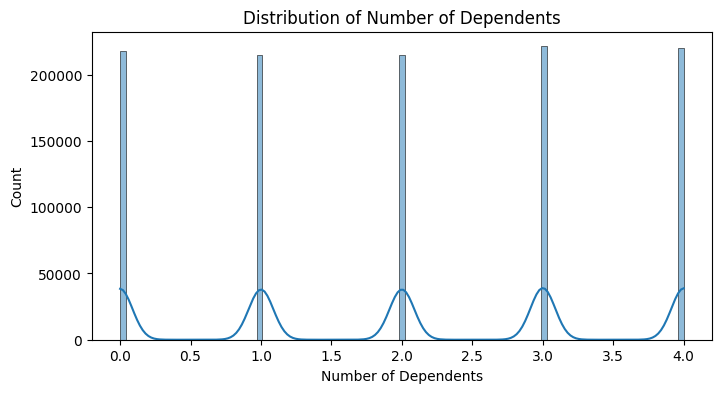

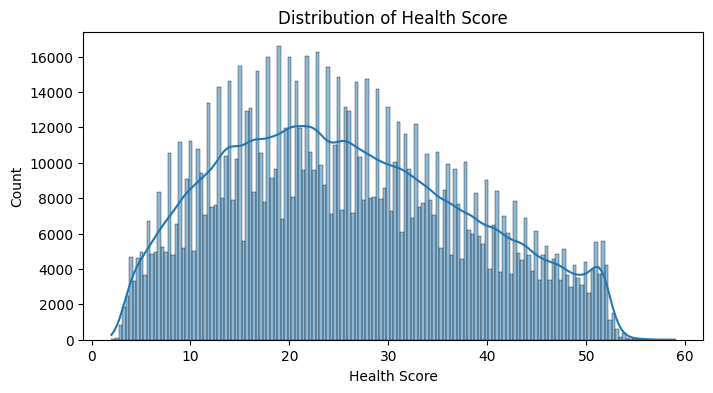

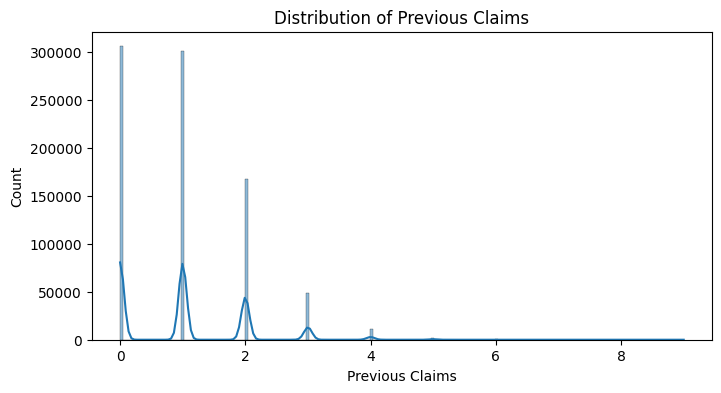

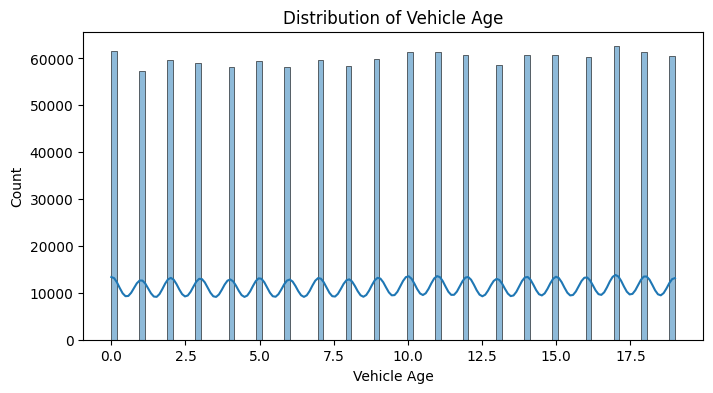

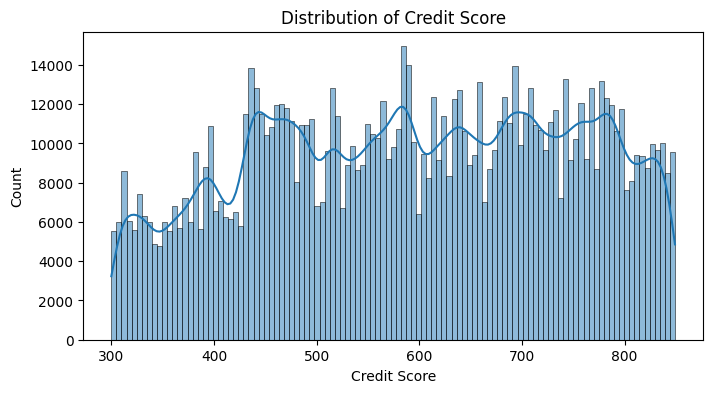

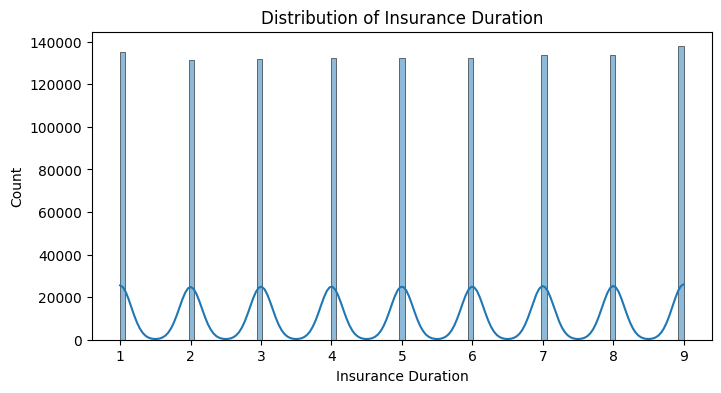

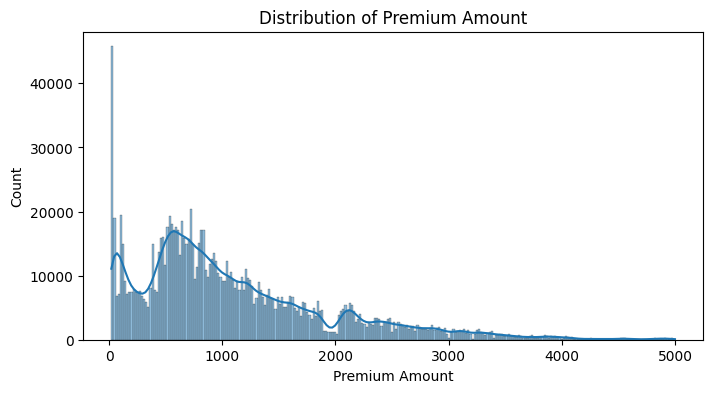


Value counts for Gender:


Gender
Male      602571
Female    597429
Name: count, dtype: int64


Value counts for Marital Status:


Marital Status
Single      395391
Married     394316
Divorced    391764
Name: count, dtype: int64


Value counts for Education Level:


Education Level
Master's       303818
PhD            303507
Bachelor's     303234
High School    289441
Name: count, dtype: int64


Value counts for Occupation:


Occupation
Employed         282750
Self-Employed    282645
Unemployed       276530
Name: count, dtype: int64


Value counts for Location:


Location
Suburban    401542
Rural       400947
Urban       397511
Name: count, dtype: int64


Value counts for Policy Type:


Policy Type
Premium          401846
Comprehensive    399600
Basic            398554
Name: count, dtype: int64


Value counts for Policy Start Date:


Policy Start Date
2020-02-08 15:21:39.134960    142
2023-08-13 15:21:39.155231    137
2022-02-02 15:21:39.134960    137
2022-08-30 15:21:39.134960    134
2023-11-02 15:21:39.134960    118
                             ... 
2021-06-07 15:21:39.104139      1
2024-07-19 15:21:39.233998      1
2019-12-14 15:21:39.110557      1
2020-07-23 15:21:39.217387      1
2020-10-19 15:21:39.118178      1
Name: count, Length: 167381, dtype: int64


Value counts for Customer Feedback:


Customer Feedback
Average    377905
Poor       375518
Good       368753
Name: count, dtype: int64


Value counts for Smoking Status:


Smoking Status
Yes    601873
No     598127
Name: count, dtype: int64


Value counts for Exercise Frequency:


Exercise Frequency
Weekly     306179
Monthly    299830
Rarely     299420
Daily      294571
Name: count, dtype: int64


Value counts for Property Type:


Property Type
House        400349
Apartment    399978
Condo        399673
Name: count, dtype: int64

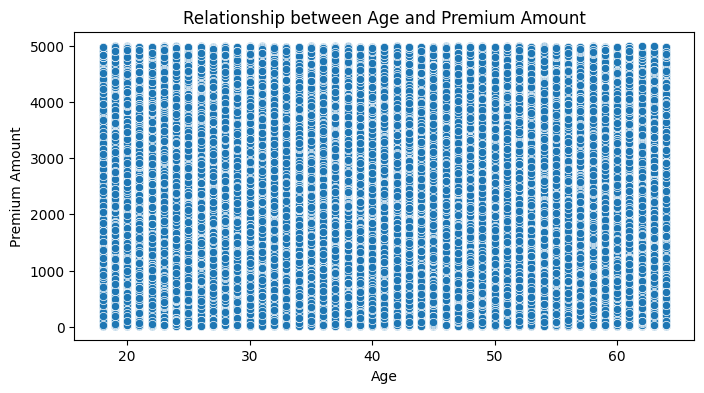

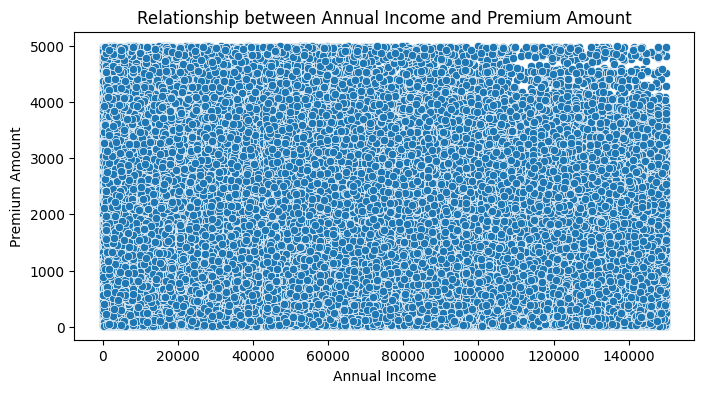

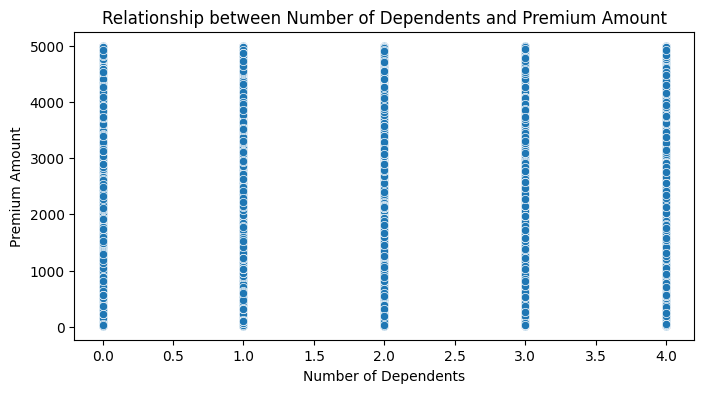

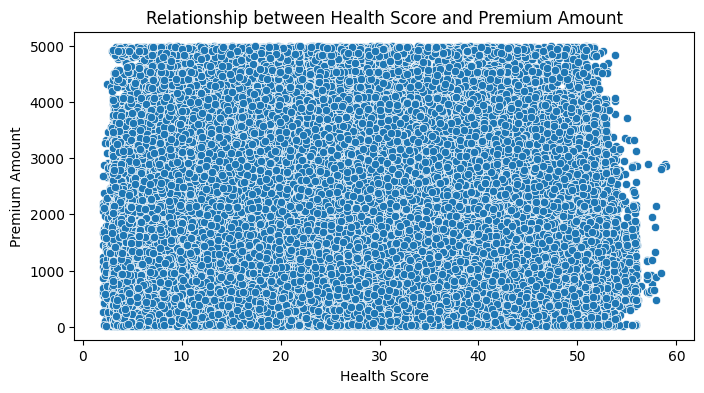

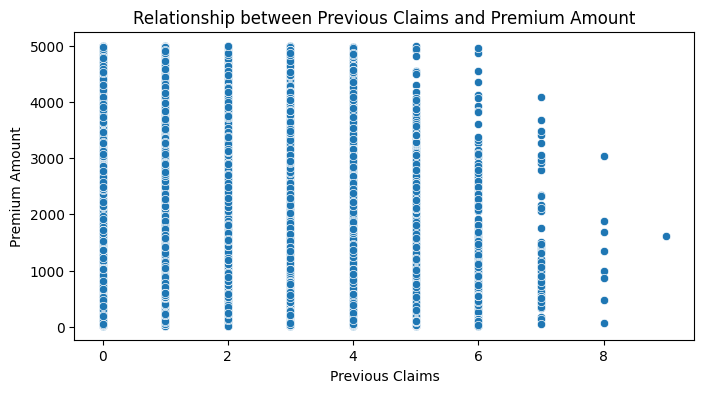

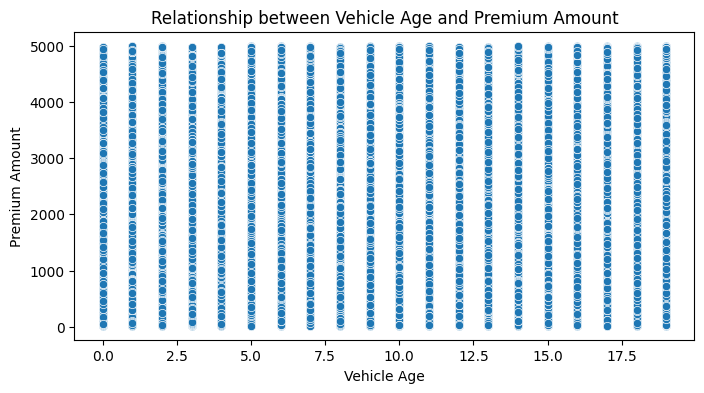

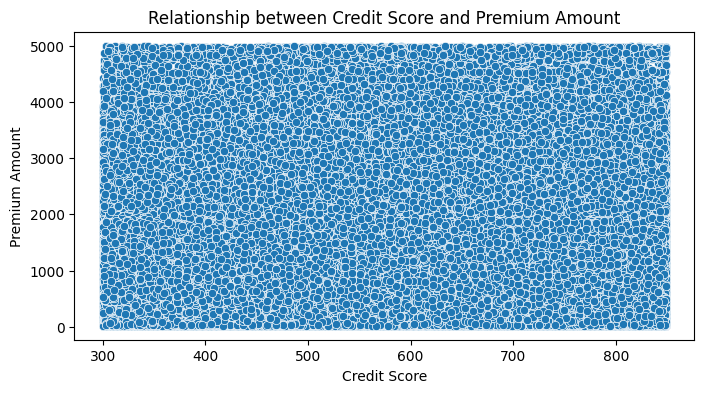

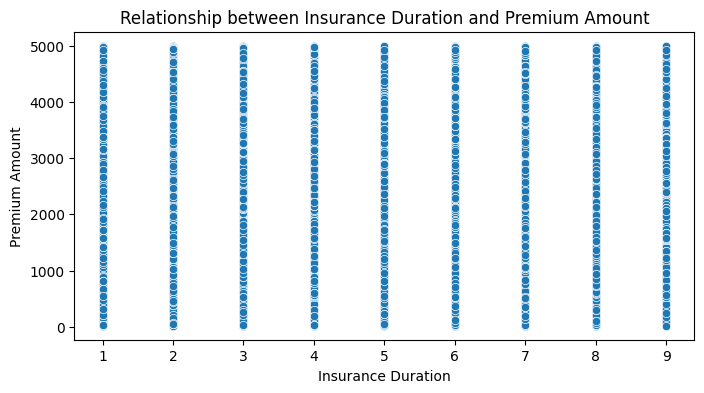

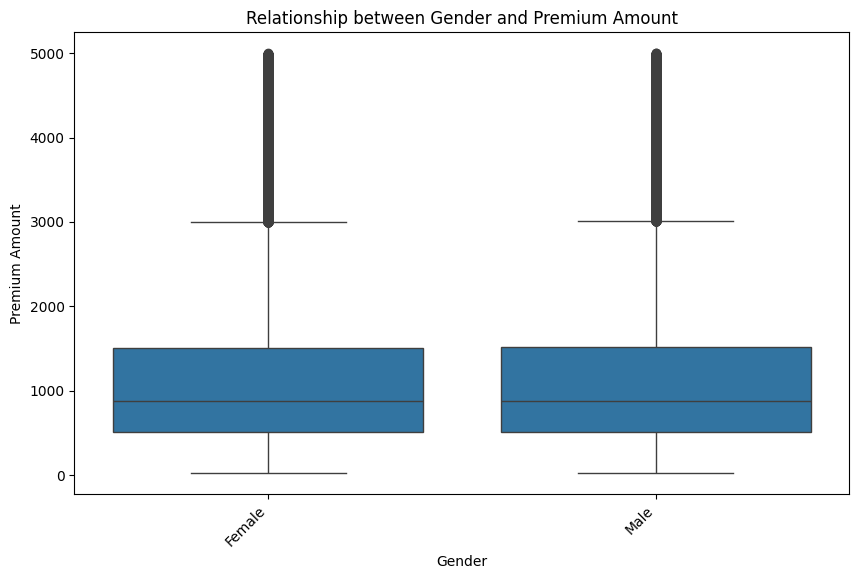

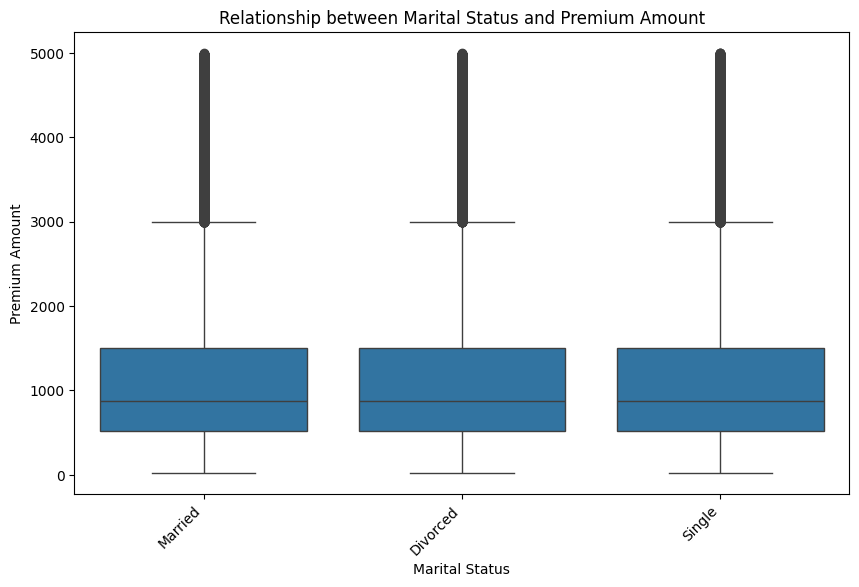

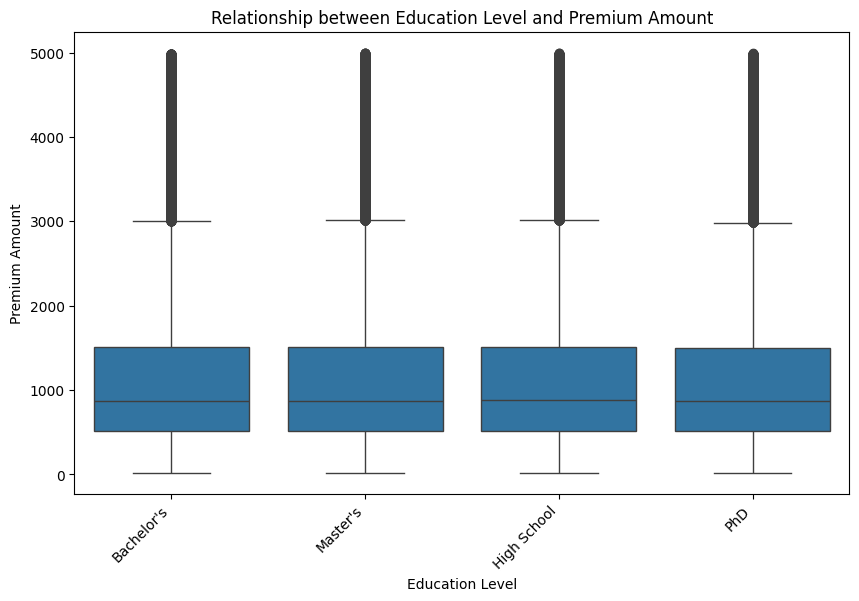

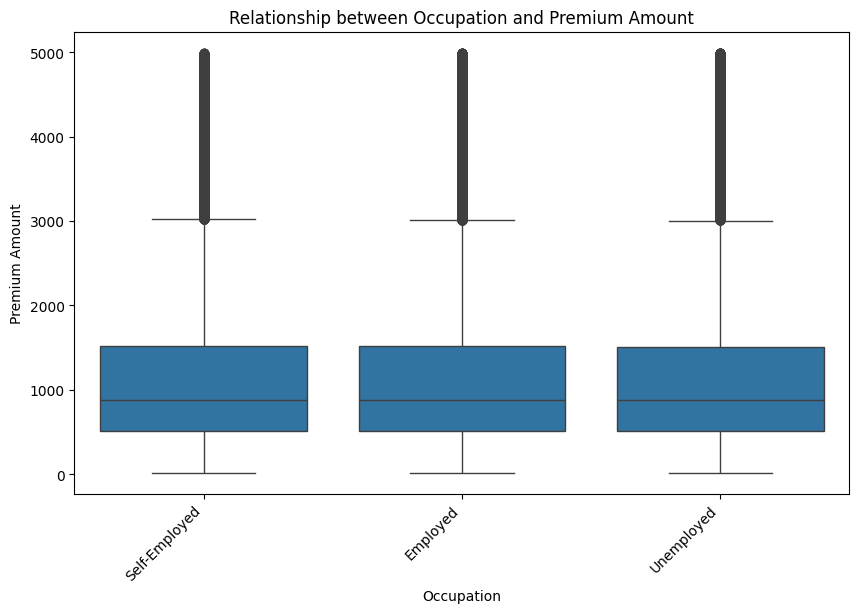

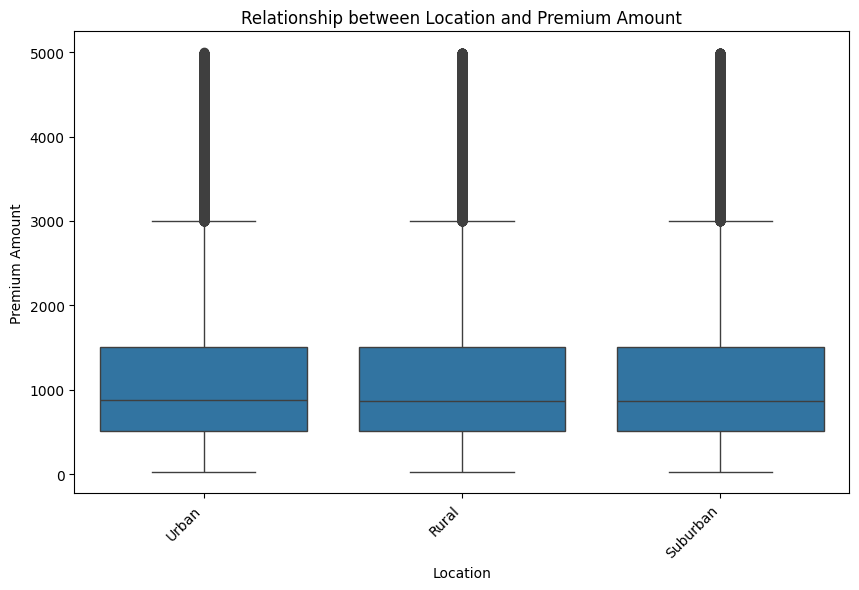

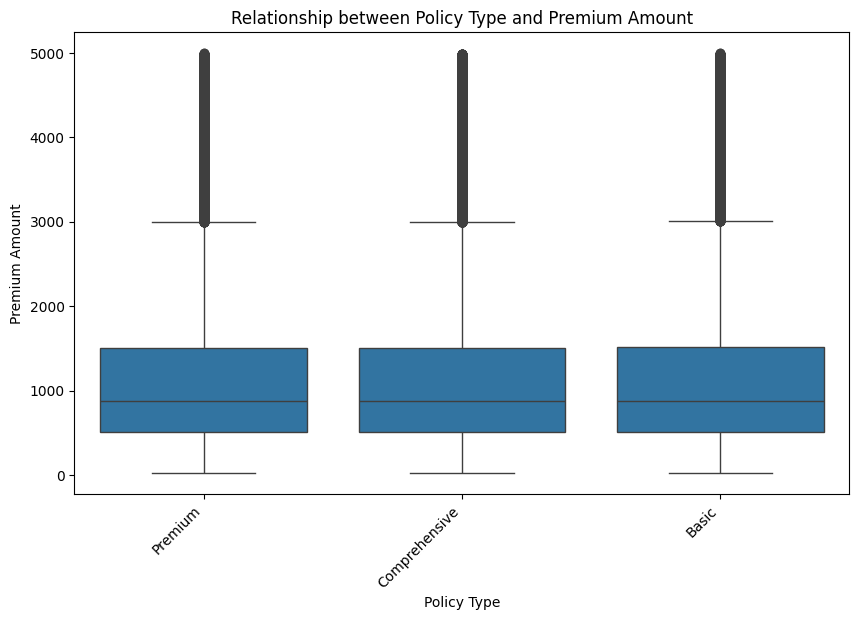

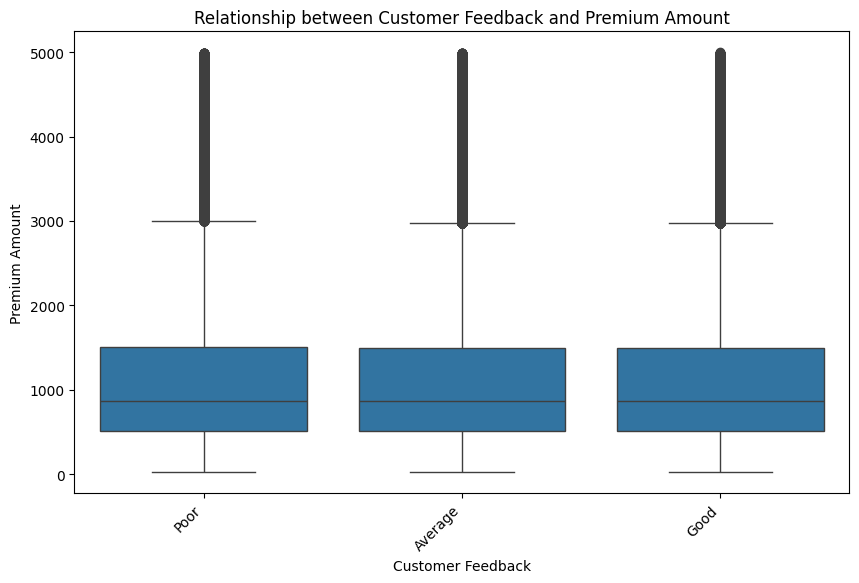

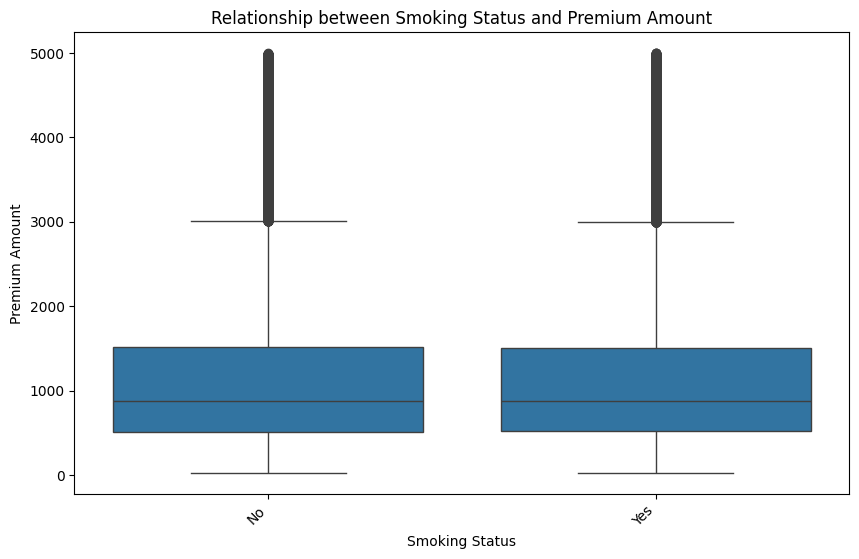

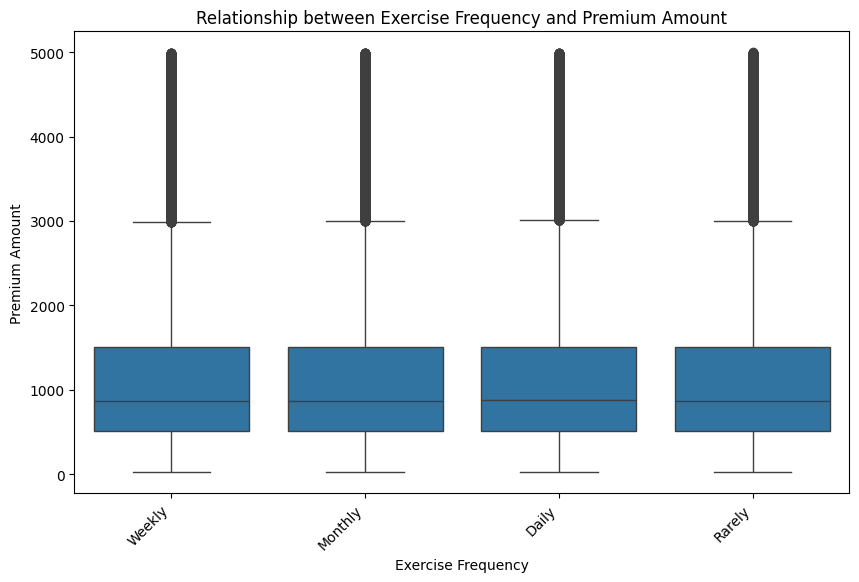

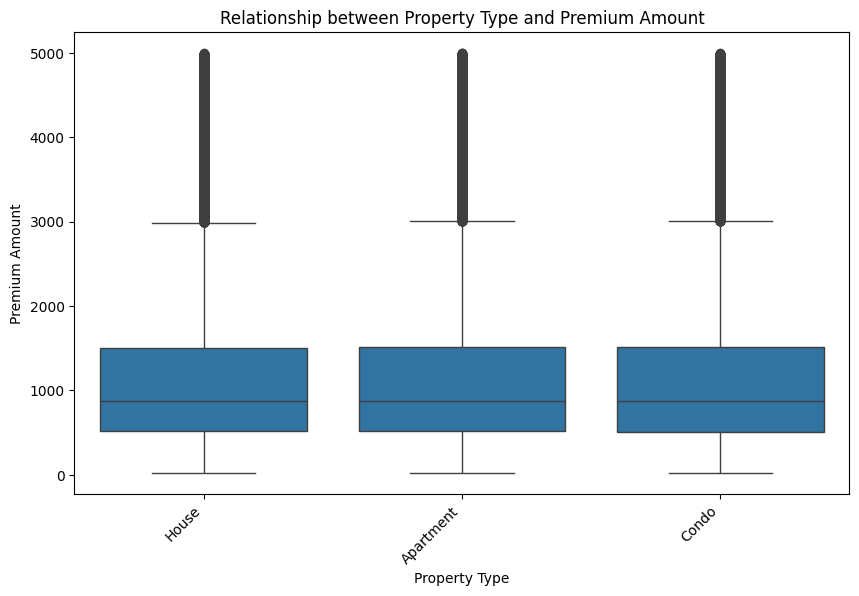

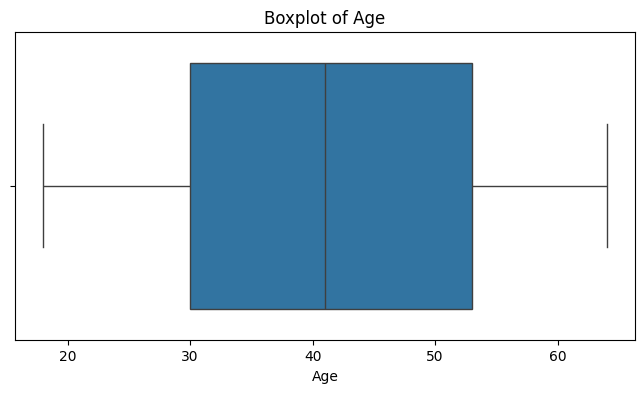

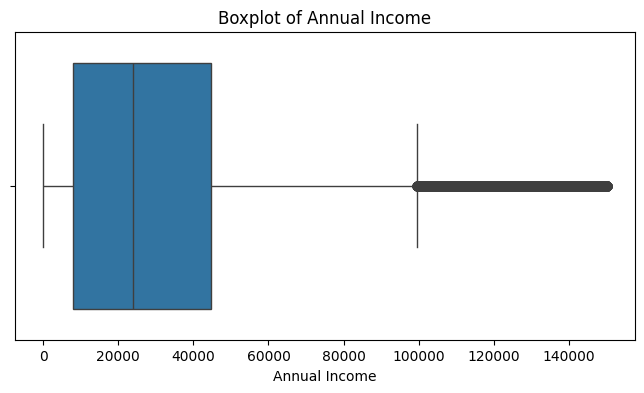

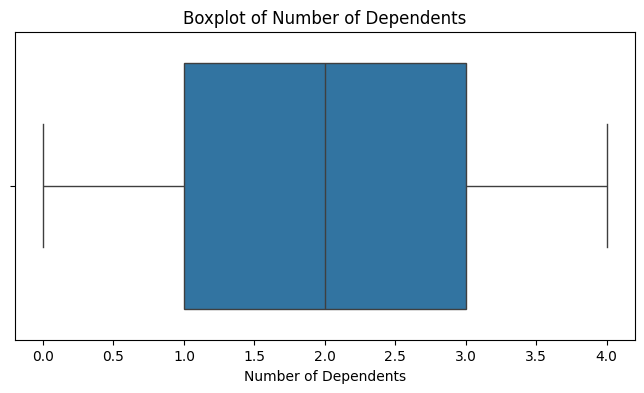

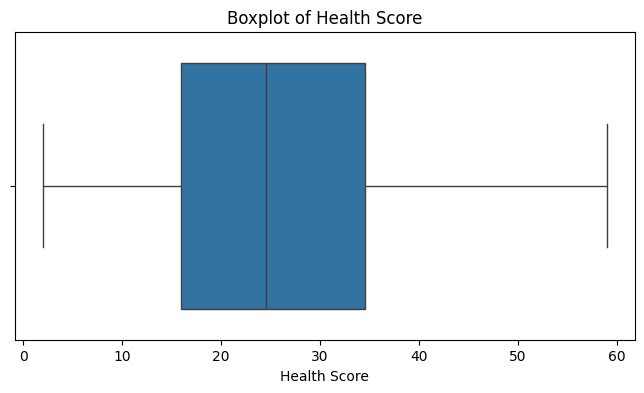

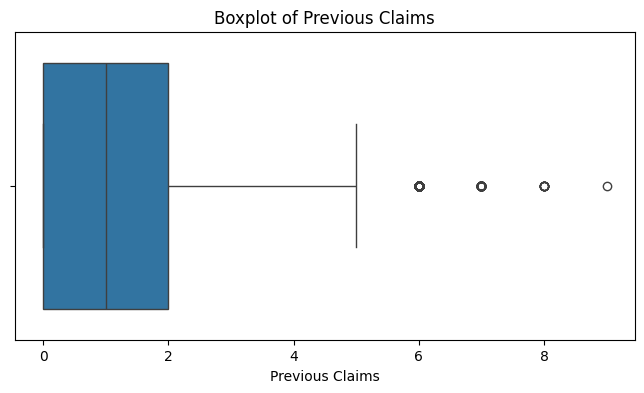

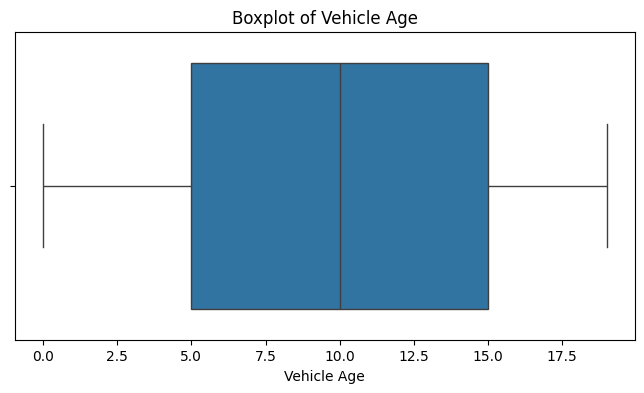

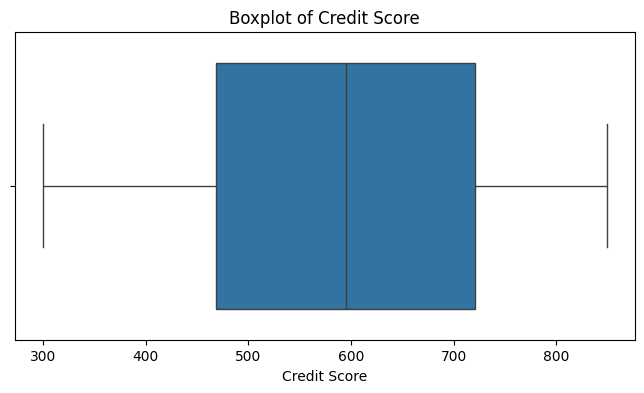

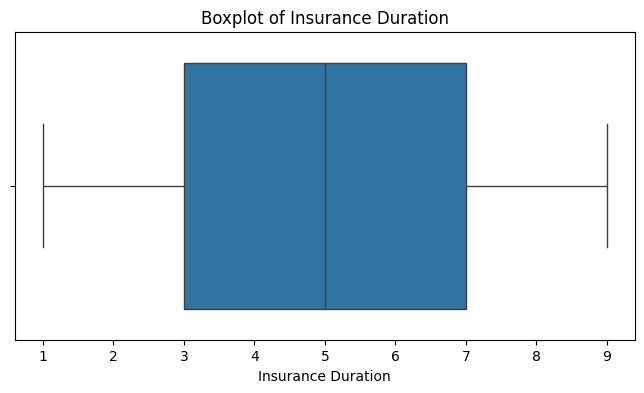

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Shape and Info
print("Shape of df_train:", df_train.shape)
print("\nInfo of df_train:")
display(df_train.info())

# Descriptive Statistics
print("\nDescriptive Statistics of Numerical Features:")
display(df_train.describe())

# Missing Values
print("\nMissing Values:")
missing_values = df_train.isnull().sum()
missing_percentage = (missing_values / len(df_train)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
display(missing_df)

# Visualization of missing data pattern (heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data Distribution
numerical_features = df_train.select_dtypes(include=['number']).columns
categorical_features = df_train.select_dtypes(exclude=['number']).columns

# Histograms for numerical features
for col in numerical_features:
  plt.figure(figsize=(8, 4))
  sns.histplot(df_train[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

# Value counts for categorical features
for col in categorical_features:
  print(f"\nValue counts for {col}:")
  display(df_train[col].value_counts())

# Relationships between numerical features and target variable
for col in numerical_features:
  if col != 'Premium Amount' and col != 'id':
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=col, y='Premium Amount', data=df_train)
    plt.title(f'Relationship between {col} and Premium Amount')
    plt.show()

# Relationships between categorical features and target variable
for col in categorical_features:
  if col != 'Policy Start Date':  # Exclude date column for boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Premium Amount', data=df_train)
    plt.title(f'Relationship between {col} and Premium Amount')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Outlier detection (using boxplots)
for col in numerical_features:
  if col != 'Premium Amount' and col != 'id':
      plt.figure(figsize=(8, 4))
      sns.boxplot(x=col, data=df_train)
      plt.title(f'Boxplot of {col}')
      plt.show()

**Reasoning**:
The previous code block generated a large number of plots, many of which are difficult to interpret or irrelevant.  I will refine the code to focus on more informative visualizations and statistical summaries related to the target variable "Premium Amount" and key features, addressing missing values and outliers effectively.



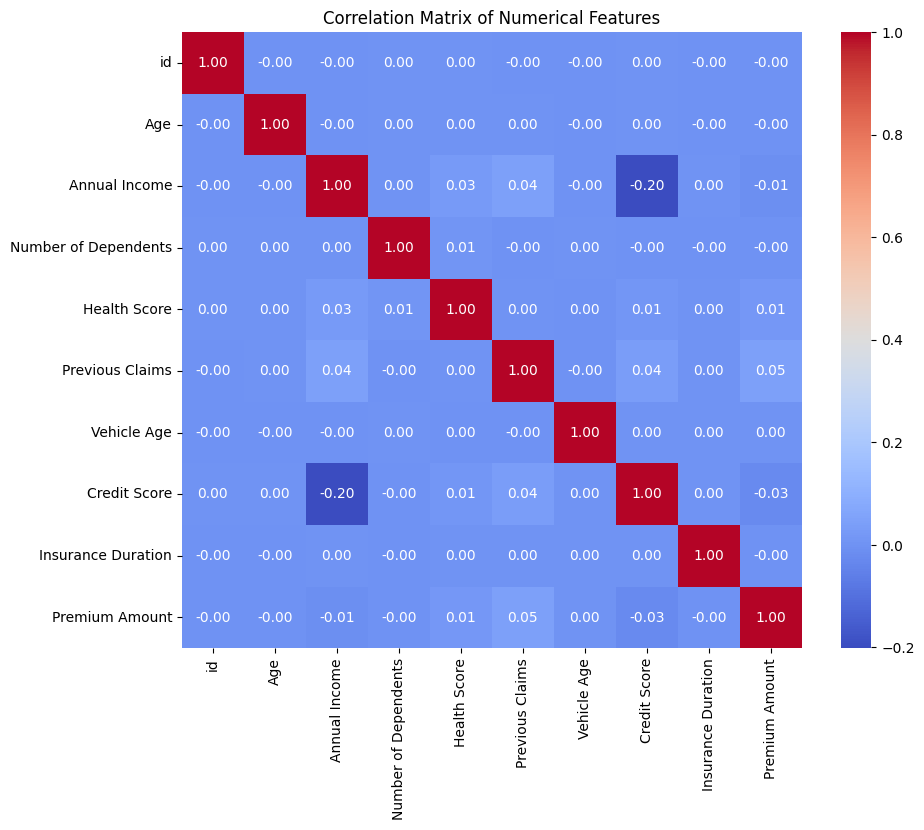

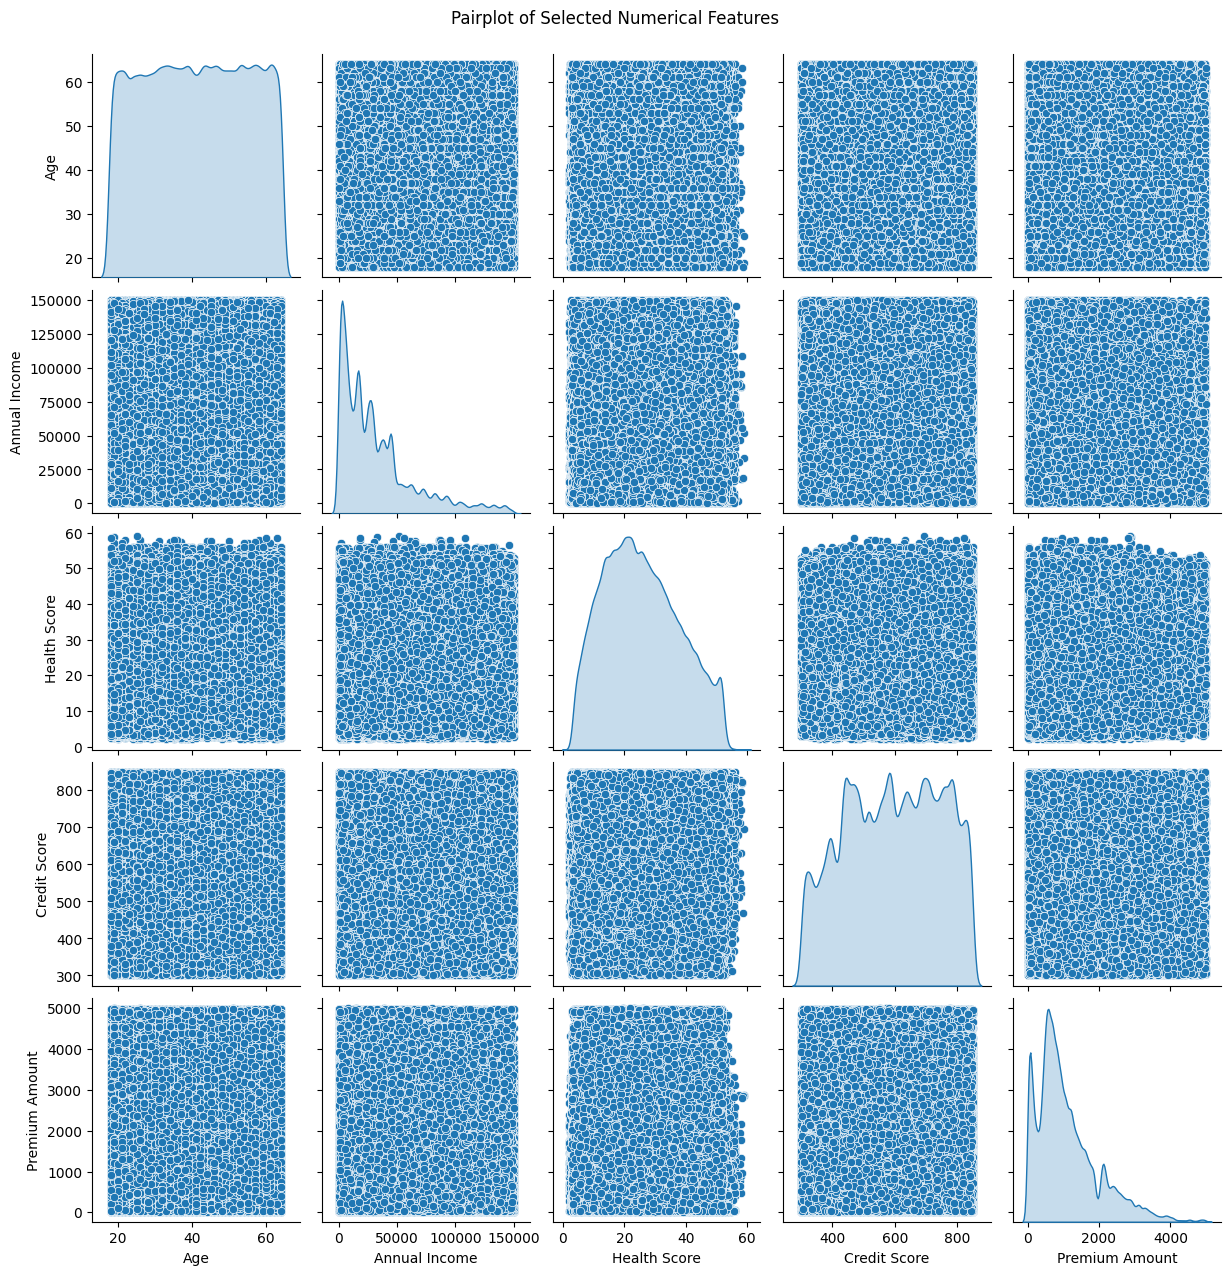

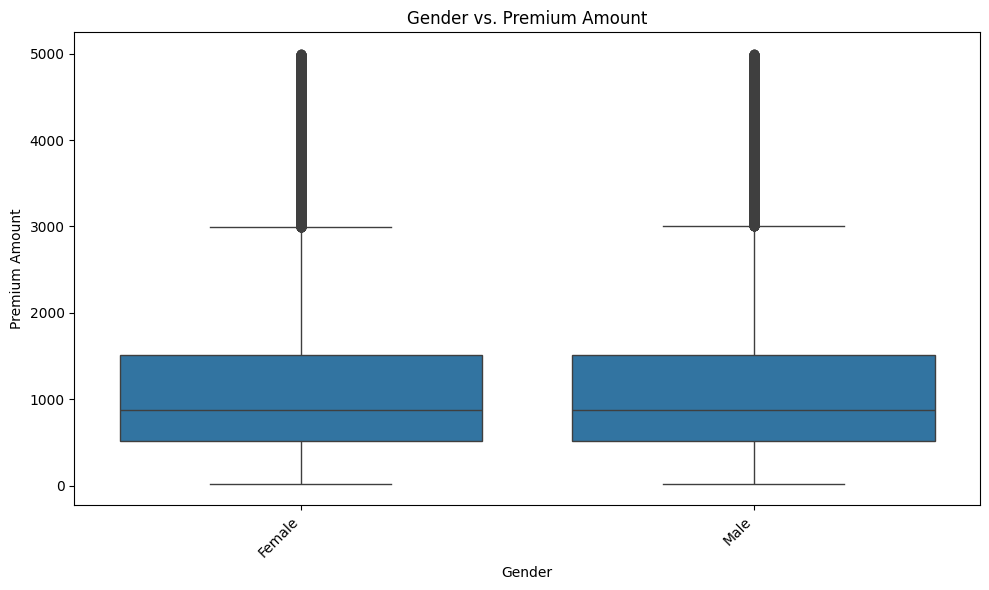

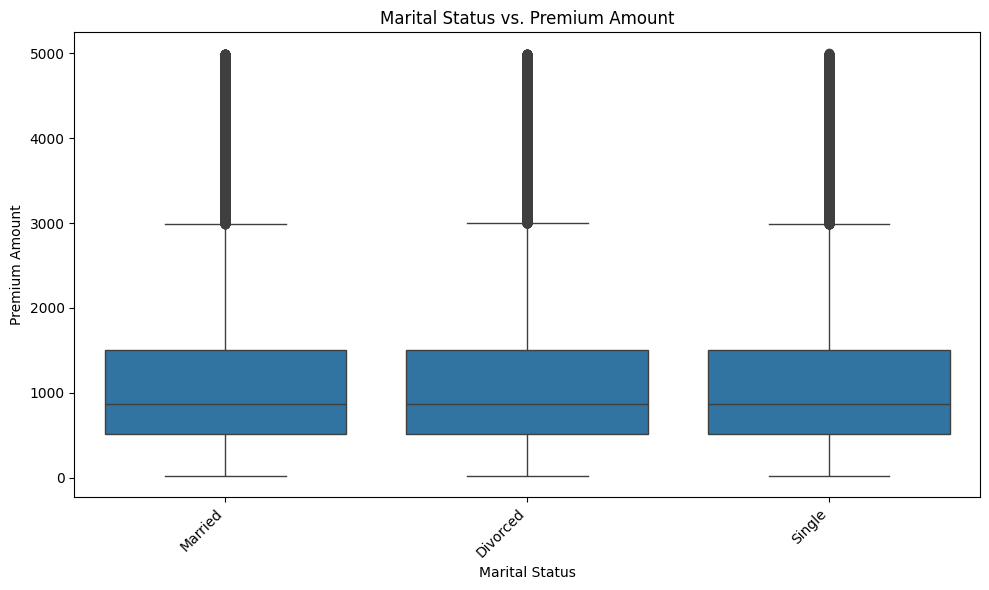

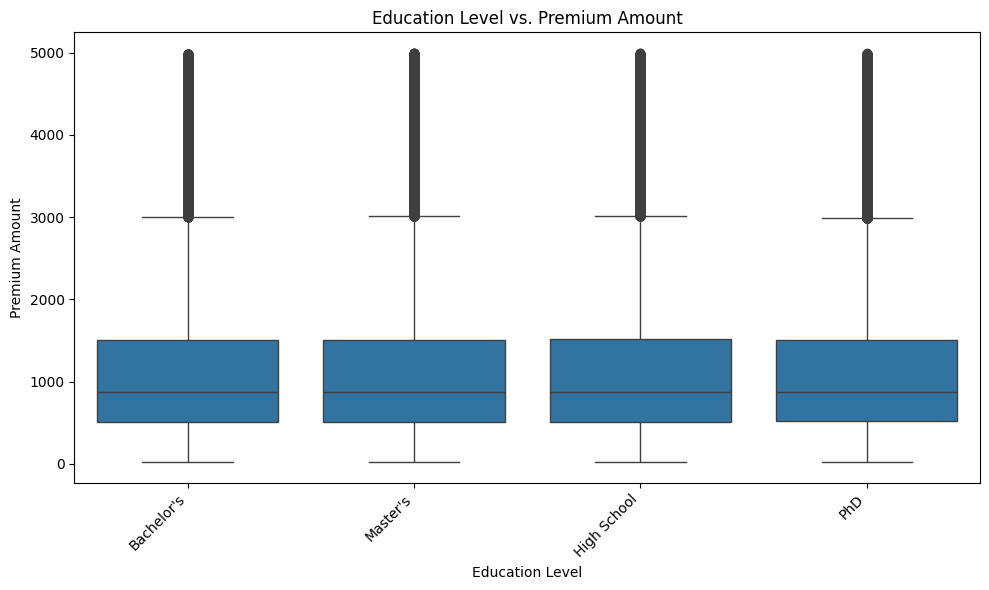

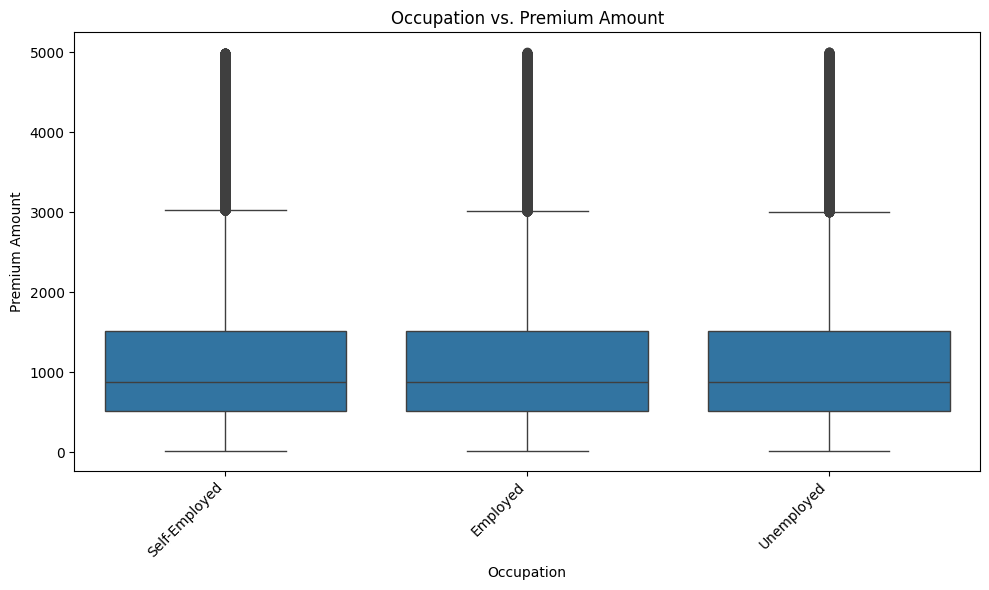

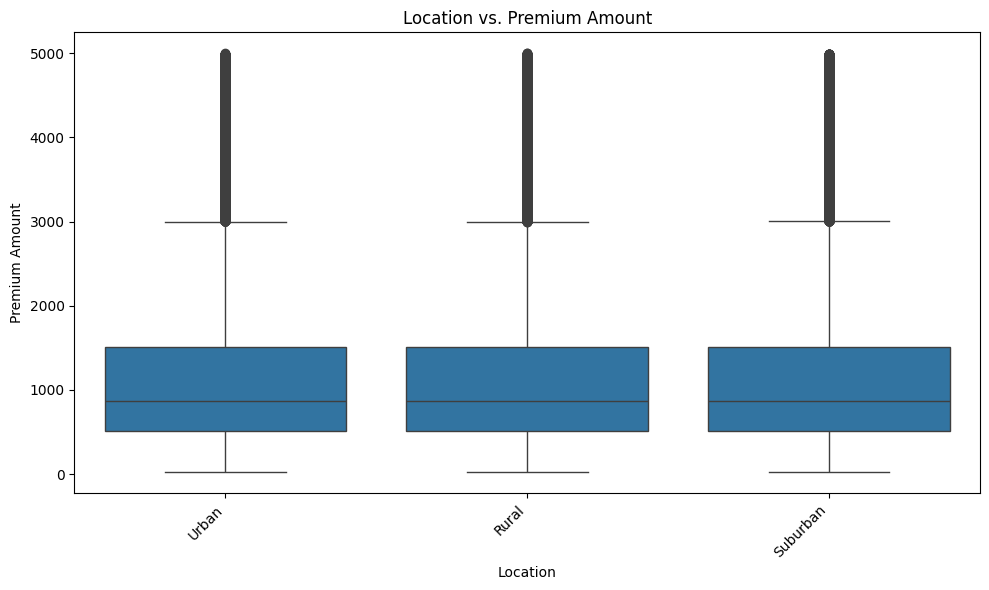

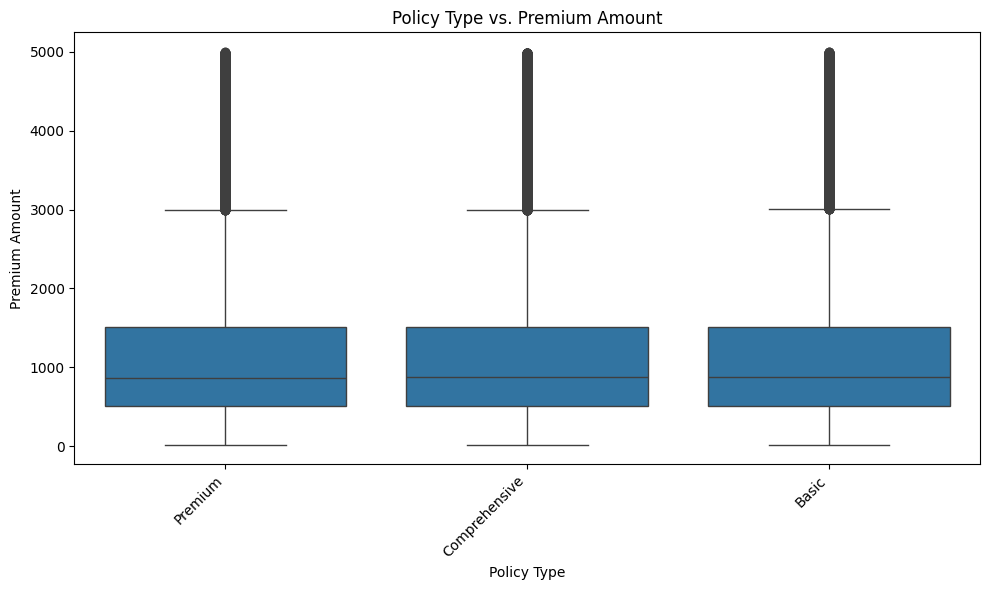

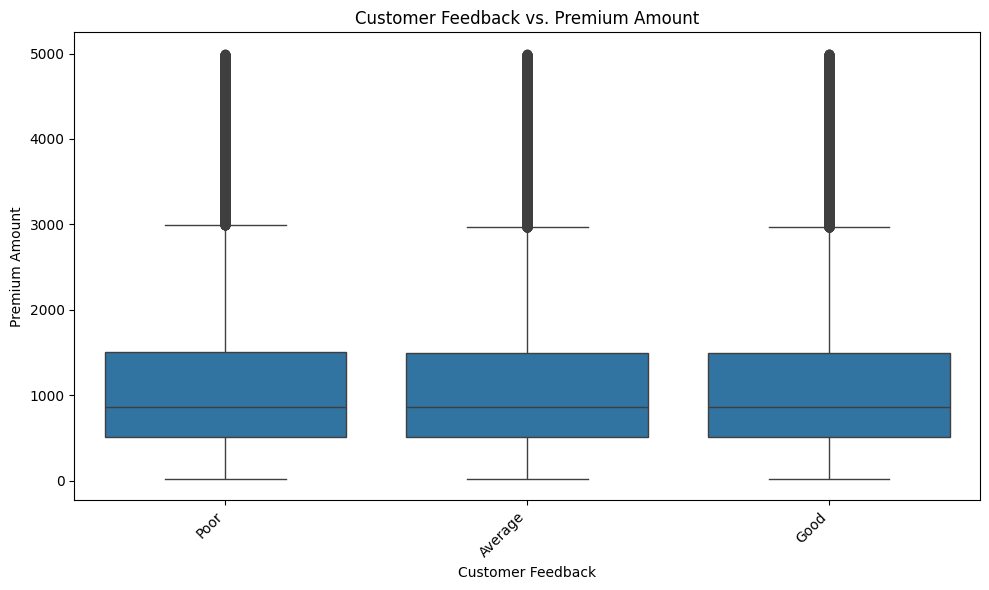

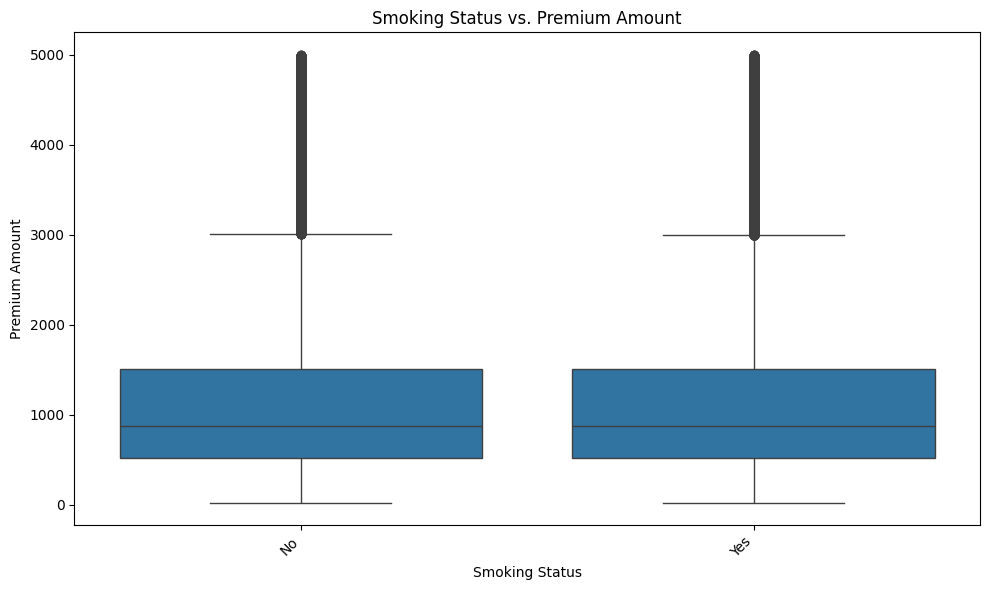

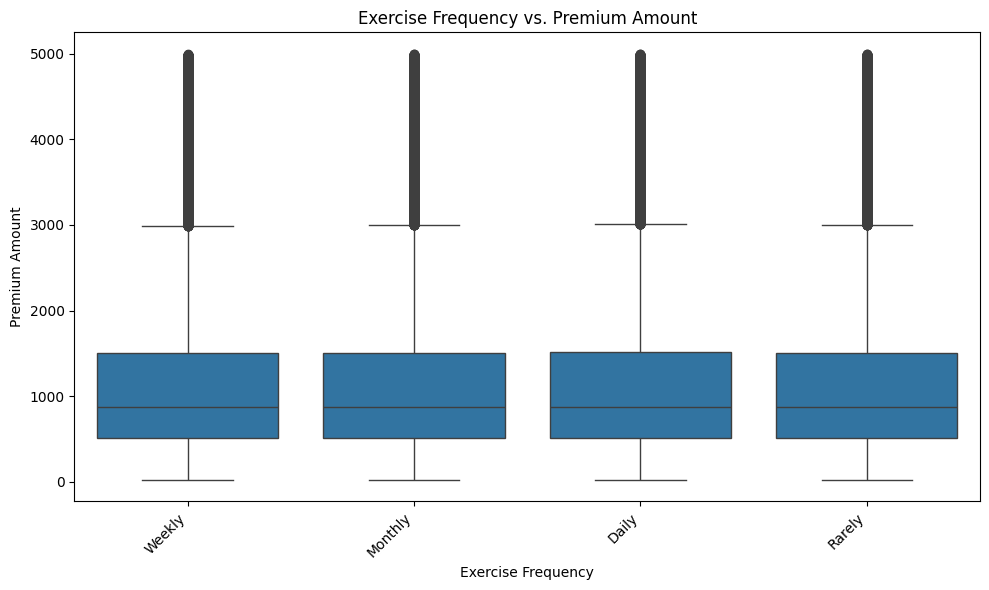

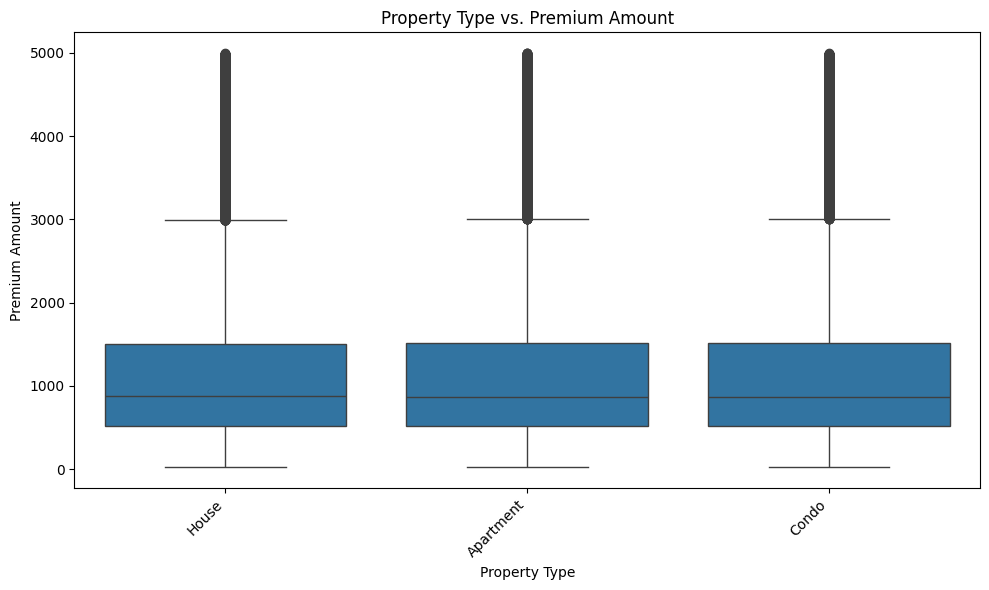

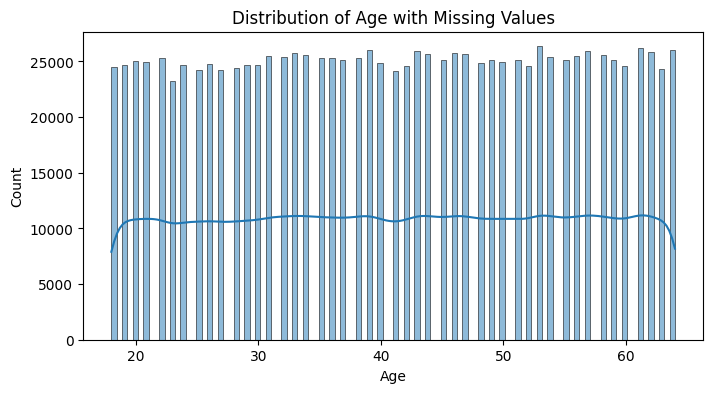

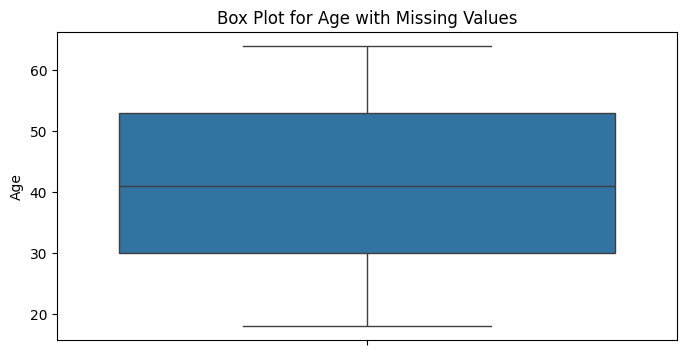

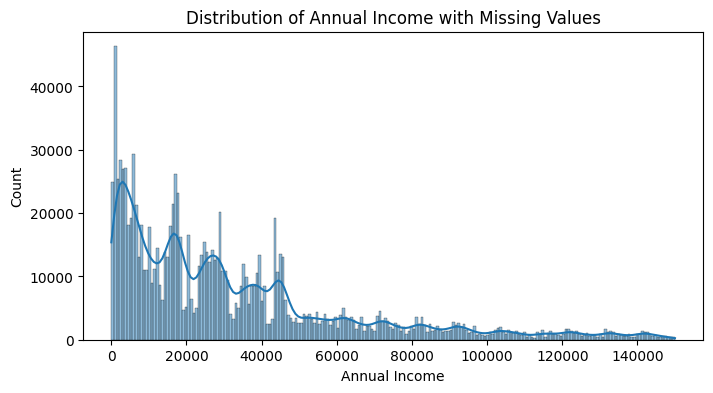

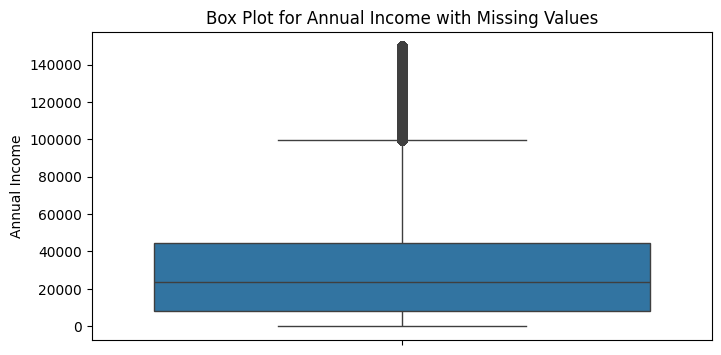

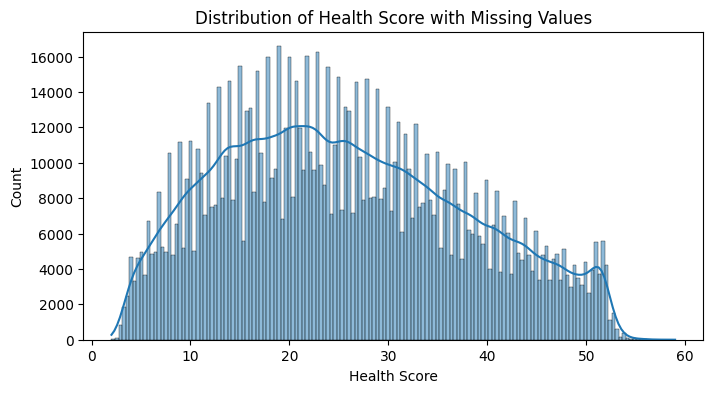

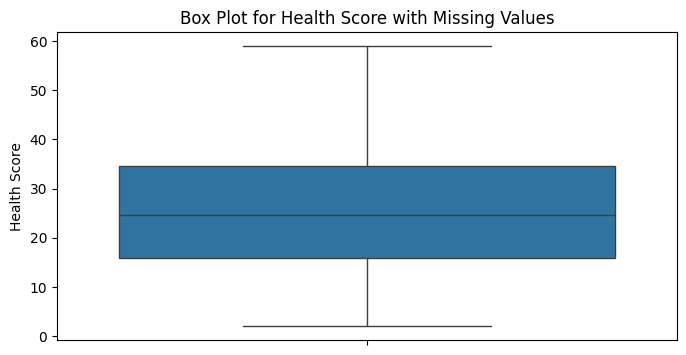

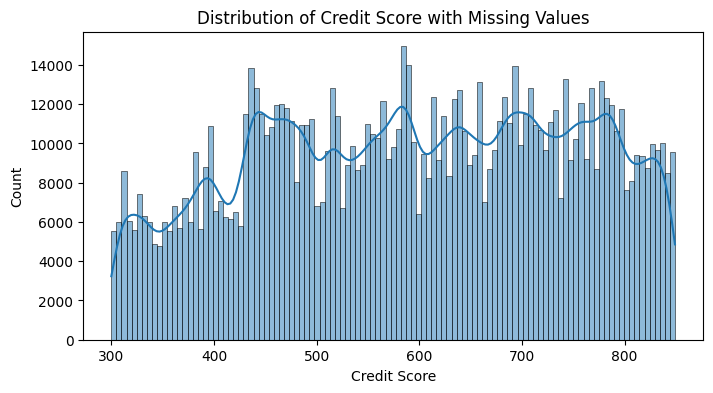

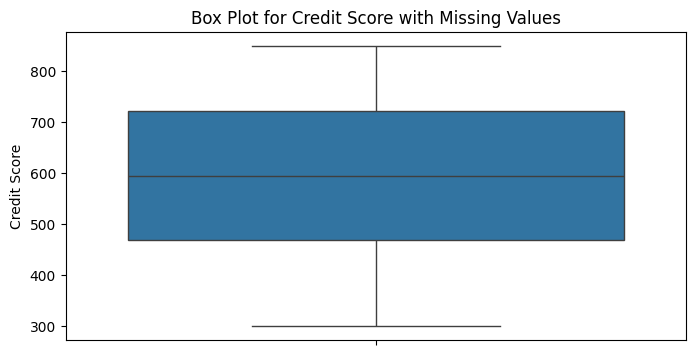

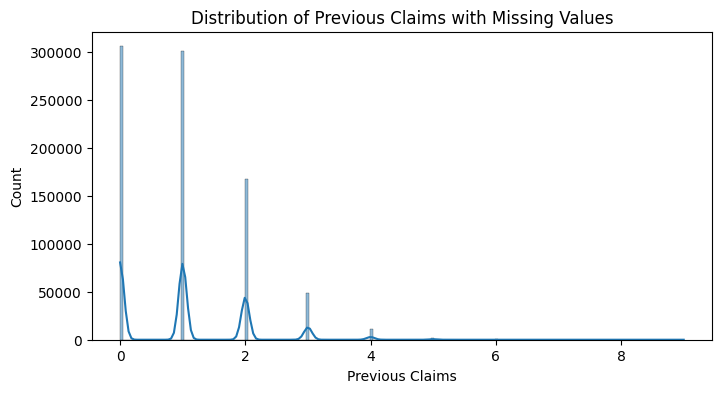

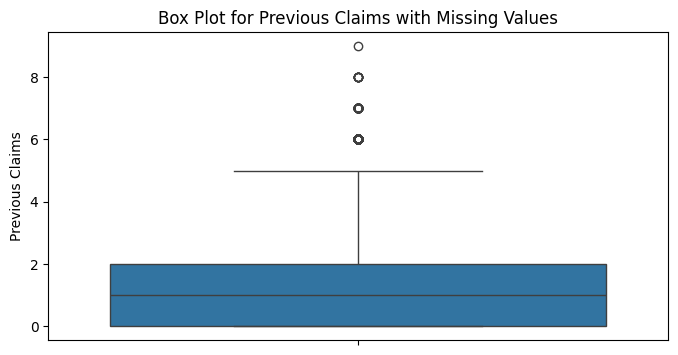

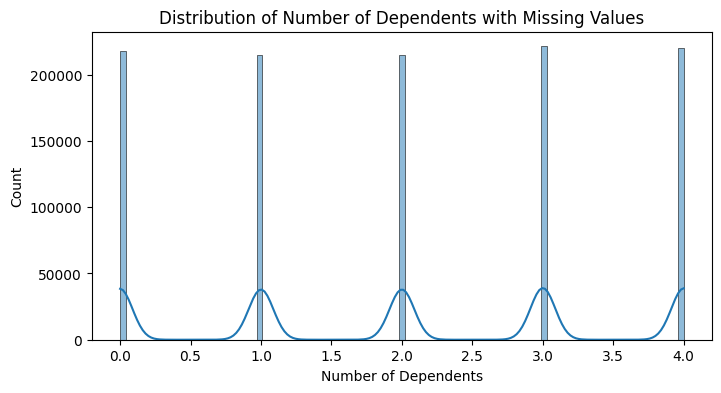

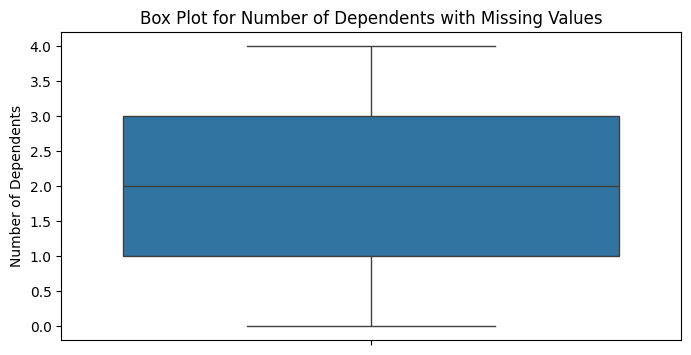

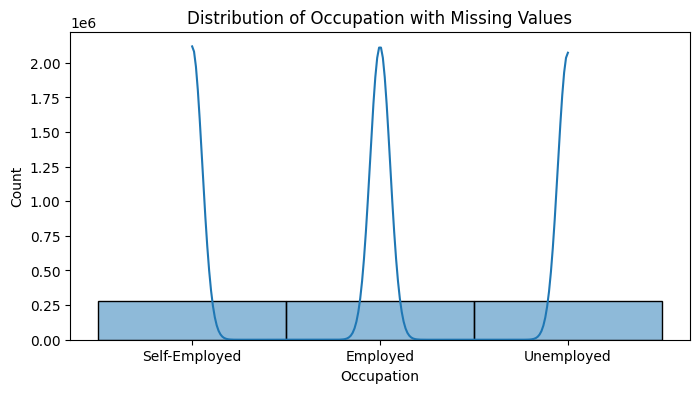

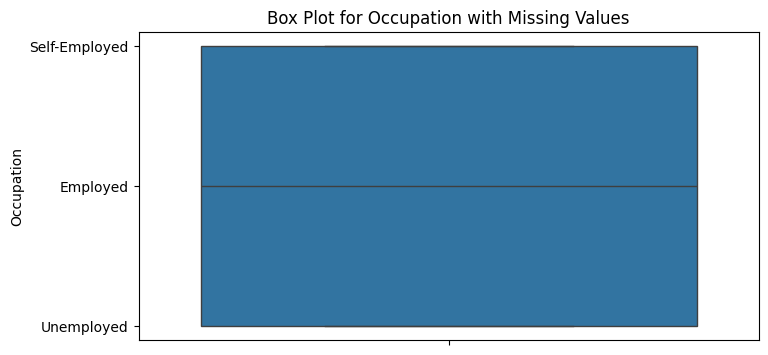

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on relationships with 'Premium Amount'
numerical_features = df_train.select_dtypes(include=['number']).columns
categorical_features = df_train.select_dtypes(exclude=['number']).columns

# Correlation matrix (heatmap) for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df_train[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Pairplot for selected numerical features and 'Premium Amount'
selected_numerical_features = ['Age', 'Annual Income', 'Health Score', 'Credit Score', 'Premium Amount']
sns.pairplot(df_train[selected_numerical_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()

# Box plots for categorical features vs. 'Premium Amount'
for col in categorical_features:
    if col not in ['Policy Start Date', 'id']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=col, y='Premium Amount', data=df_train)
        plt.title(f'{col} vs. Premium Amount')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Missing Value Analysis for crucial features
missing_cols = ['Age', 'Annual Income', 'Health Score', 'Credit Score','Previous Claims', 'Number of Dependents', 'Occupation']
for col in missing_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[col], kde=True)
    plt.title(f"Distribution of {col} with Missing Values")
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.boxplot(y=col, data=df_train)
    plt.title(f"Box Plot for {col} with Missing Values")
    plt.show()

## Data cleaning

### Subtask:
Clean the training and testing datasets (`df_train` and `df_test`)


**Reasoning**:
Impute missing values and handle outliers in both `df_train` and `df_test` datasets.  Use the mean for numerical features and mode for categorical features for imputation. Cap outliers at the 95th percentile.  Apply the same strategy to both datasets.



In [4]:
import pandas as pd
import numpy as np

# Identify numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns
categorical_cols = df_train.select_dtypes(exclude=np.number).columns

# Impute missing numerical values with the mean
for col in numerical_cols:
    if df_train[col].isnull().any():
        mean_val = df_train[col].mean()
        df_train[col].fillna(mean_val, inplace=True)
        df_test[col].fillna(mean_val, inplace=True)

# Impute missing categorical values with the mode
for col in categorical_cols:
    if df_train[col].isnull().any():
        mode_val = df_train[col].mode()[0]
        df_train[col].fillna(mode_val, inplace=True)
        if col in df_test.columns:  # Check if the column exists in df_test
            df_test[col].fillna(mode_val, inplace=True)

# Outlier handling (capping at the 95th percentile)
for col in numerical_cols:
    if col != 'id' and col != 'Premium Amount':  # Exclude ID and target
        upper_limit = df_train[col].quantile(0.95)
        df_train[col] = np.where(df_train[col] > upper_limit, upper_limit, df_train[col])
        df_test[col] = np.where(df_test[col] > upper_limit, upper_limit, df_test[col])

display(df_train.head())
display(df_test.head())

<ipython-input-4-c81664d17b69>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(mean_val, inplace=True)
<ipython-input-4-c81664d17b69>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       103528.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's       Employed     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's       Employed     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0     372.00000                 5.0  2023-12-23 15:21:39.134960   
1         12.0     694.00000                 2.0  2023-06-12 15:21:39.111551   
2         14.0     592.92435                 3.0  2023-09-30 15:21:39.221386   
3          0.0     367.00000                 1.0  2024-06-12 15:21:39.226954   
4          8.0     598.00000                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0         Single                   4.0   
1  1200001  31.0  Female       103528.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0         1.002689         19.0     592.92435                 1.0   
1         1.002689         14.0     372.00000                 8.0   
2         1.002689         16.0     818.00000                 9.0   
3         1.000000          3.0     770.00000                 5.0   
4         1.002689         14.0     755.00000                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

**Reasoning**:
Fix the chained assignment warnings from the previous code block and re-run the data cleaning steps.



In [5]:
import pandas as pd
import numpy as np

# Identify numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=np.number).columns
categorical_cols = df_train.select_dtypes(exclude=np.number).columns

# Impute missing numerical values with the mean
for col in numerical_cols:
    if df_train[col].isnull().any():
        mean_val = df_train[col].mean()
        df_train[col] = df_train[col].fillna(mean_val)
        df_test[col] = df_test[col].fillna(mean_val)

# Impute missing categorical values with the mode
for col in categorical_cols:
    if df_train[col].isnull().any():
        mode_val = df_train[col].mode()[0]
        df_train[col] = df_train[col].fillna(mode_val)
        if col in df_test.columns:  # Check if the column exists in df_test
            df_test[col] = df_test[col].fillna(mode_val)

# Outlier handling (capping at the 95th percentile)
for col in numerical_cols:
    if col != 'id' and col != 'Premium Amount':  # Exclude ID and target
        upper_limit = df_train[col].quantile(0.95)
        df_train[col] = np.where(df_train[col] > upper_limit, upper_limit, df_train[col])
        df_test[col] = np.where(df_test[col] > upper_limit, upper_limit, df_test[col])

display(df_train.head())
display(df_test.head())

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       103528.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's       Employed     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's       Employed     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Date  \
0         17.0     372.00000                 5.0  2023-12-23 15:21:39.134960   
1         12.0     694.00000                 2.0  2023-06-12 15:21:39.111551   
2         14.0     592.92435                 3.0  2023-09-30 15:21:39.221386   
3          0.0     367.00000                 1.0  2024-06-12 15:21:39.226954   
4          8.0     598.00000                 4.0  2021-12-01 15:21:39.252145   

  Customer Feedback Smoking Status Exercise Frequency Property Type  \
0              Poor             No             Weekly         House   
1           Average            Yes            Monthly         House   
2              Good            Yes             Weekly         House   
3              Poor            Yes              Daily     Apartment   
4              Poor            Yes             Weekly         House   

  Premium Amount  
0         2869.0  
1         1483.0  
2          567.0  
3          765.0  
4         2022.0  

[5 rows x 21 columns]

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0         Single                   4.0   
1  1200001  31.0  Female       103528.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0         1.002689         19.0     592.92435                 1.0   
1         1.002689         14.0     372.00000                 8.0   
2         1.002689         16.0     818.00000                 9.0   
3         1.000000          3.0     770.00000                 5.0   
4         1.002689         14.0     755.00000                 7.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-06-04 15:21:39.245086              Poor            Yes   
1  2024-04-22 15:21:39.224915              Good            Yes   
2  2023-04-05 15:21:39.134960           Average            Yes   
3  2023-10-25 15:21:39.134960              Poor            Yes   
4  2021-11-26 15:21:39.259788           Average             No   

  Exercise Frequency Property Type  
0             Weekly         House  
1             Rarely     Apartment  
2            Monthly         Condo  
3              Daily         House  
4             Weekly         House

## Feature engineering

### Subtask:
Engineer new features from existing ones in both the training (`df_train`) and testing (`df_test`) datasets to potentially improve model performance.


**Reasoning**:
Apply one-hot encoding to categorical features, create interaction and polynomial features, and then scale numerical features using standardization. This addresses all parts of the subtask instructions in one go.



In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Categorical Encoding
categorical_cols = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']
df_train = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Align columns in df_test with df_train
missing_cols = set(df_train.columns) - set(df_test.columns)
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns] # Ensure same order
df_test = df_test.drop(columns=['Premium Amount'])


# 2. Interaction Features (Example: Age * Annual Income)
df_train['Age_AnnualIncome'] = df_train['Age'] * df_train['Annual Income']
df_test['Age_AnnualIncome'] = df_test['Age'] * df_test['Annual Income']

# 3. Polynomial Features (Example: Age^2)
df_train['Age_squared'] = df_train['Age'] ** 2
df_test['Age_squared'] = df_test['Age'] ** 2


# 4. Feature Scaling
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Number of Dependents', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Age_AnnualIncome', 'Age_squared']
scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

display(df_train.head())
display(df_test.head())

id       Age  Annual Income  Number of Dependents  Health Score  \
0   0 -1.656463      -0.758246             -0.747535     -0.249161   
1   1 -0.156180      -0.000159              0.732830     -0.858417   
2   2 -1.356406      -0.213120              0.732830      1.881259   
3   3 -1.506435       2.518149             -0.007353     -1.259870   
4   4 -1.506435       0.279290             -0.747535     -0.441816   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0         1.303505     1.286338     -1.574842           -0.007023   
1         0.013610     0.420713      0.728681           -1.163391   
2         0.013610     0.766963      0.005606           -0.777935   
3         0.013610    -1.656787     -1.610611           -1.548847   
4        -1.276286    -0.271787      0.041916           -0.392479   

            Policy Start Date  ...  Customer Feedback_Good  \
0  2023-12-23 15:21:39.134960  ...                   False   
1  2023-06-12 15:21:39.111551  ...                   False   
2  2023-09-30 15:21:39.221386  ...                    True   
3  2024-06-12 15:21:39.226954  ...                   False   
4  2021-12-01 15:21:39.252145  ...                   False   

   Customer Feedback_Poor  Smoking Status_Yes  Exercise Frequency_Monthly  \
0                    True               False                       False   
1                   False                True                        True   
2                   False                True                       False   
3                    True                True                       False   
4                    True                True                       False   

   Exercise Frequency_Rarely  Exercise Frequency_Weekly  Property Type_Condo  \
0                      False                       True                False   
1                      False                      False                False   
2                      False                       True                False   
3                      False                      False                False   
4                      False                       True                False   

   Property Type_House  Age_AnnualIncome  Age_squared  
0                 True         -0.852937    -1.367107  
1                 True         -0.050806    -0.312999  
2                 True         -0.547358    -1.214443  
3                False          0.670027    -1.294410  
4                 True         -0.360113    -1.294410  

[5 rows x 33 columns]

id       Age  Annual Income  Number of Dependents  Health Score  \
0  1200000 -0.981336      -1.029494              1.473012     -1.544186   
1  1200001 -0.756293       2.518149             -0.007353     -1.048098   
2  1200002  0.443933      -0.511392             -1.487718     -0.096976   
3  1200003 -0.981336      -0.044112              0.732830     -1.762764   
4  1200004 -1.281392      -0.729715             -0.007353     -1.181340   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0         0.017078     1.632588      0.005606           -1.548847   
1         0.017078     0.766963     -1.574842            1.149346   
2         0.017078     1.113213      1.615751            1.534802   
3         0.013610    -1.137412      1.272369           -0.007023   
4         0.017078     0.766963      1.165062            0.763889   

            Policy Start Date  ...  Customer Feedback_Good  \
0  2023-06-04 15:21:39.245086  ...                   False   
1  2024-04-22 15:21:39.224915  ...                    True   
2  2023-04-05 15:21:39.134960  ...                   False   
3  2023-10-25 15:21:39.134960  ...                   False   
4  2021-11-26 15:21:39.259788  ...                   False   

   Customer Feedback_Poor  Smoking Status_Yes  Exercise Frequency_Monthly  \
0                    True                True                       False   
1                   False                True                       False   
2                   False                True                        True   
3                    True                True                       False   
4                   False               False                       False   

   Exercise Frequency_Rarely  Exercise Frequency_Weekly  Property Type_Condo  \
0                      False                       True                False   
1                       True                      False                False   
2                      False                      False                 True   
3                      False                      False                False   
4                      False                       True                False   

   Property Type_House  Age_AnnualIncome  Age_squared  
0                 True         -0.949891    -0.982721  
1                False          1.465069    -0.821879  
2                False         -0.382650     0.312195  
3                 True         -0.345368    -0.982721  
4                 True         -0.799349    -1.171733  

[5 rows x 32 columns]

## Data splitting

### Subtask:
Split the training data (`df_train`) into training and validation sets.


**Reasoning**:
Split the training data into training and validation sets, stratifying by the target variable 'Premium Amount'.



In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_train.drop(columns=['Premium Amount', 'Policy Start Date', 'id'])
y = df_train['Premium Amount']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

**Reasoning**:
The error message indicates that stratification is failing because at least one class in the target variable 'Premium Amount' has only one member.  Since stratification is used to maintain the class distribution in the training and validation sets, and this is not possible with a single member class, try splitting without stratification.



In [8]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df_train.drop(columns=['Premium Amount', 'Policy Start Date', 'id'])
y = df_train['Premium Amount']

# Split data into training and validation sets without stratification
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train several regression models on the training data (X_train, y_train).


**Reasoning**:
Train the specified regression models on the prepared training data.



In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize the models
model_linear = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)
model_gb = GradientBoostingRegressor(random_state=42)

# Train the models
model_linear.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

## Model optimization

### Subtask:
Tune the hyperparameters of the trained regression models (Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor) using the validation set (X_val, y_val).


**Reasoning**:
Tune the hyperparameters of the three regression models using GridSearchCV or RandomizedSearchCV with the validation set.



In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define hyperparameter search spaces
param_grid_linear = {'fit_intercept': [True, False], 'positive': [True, False]}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create scorers
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform hyperparameter tuning
grid_search_linear = GridSearchCV(model_linear, param_grid_linear, scoring=scorer, cv=3, n_jobs=-1)
grid_search_linear.fit(X_val, y_val)


grid_search_rf = GridSearchCV(model_rf, param_grid_rf, scoring=scorer, cv=3, n_jobs=-1)
grid_search_rf.fit(X_val, y_val)

grid_search_gb = GridSearchCV(model_gb, param_grid_gb, scoring=scorer, cv=3, n_jobs=-1)
grid_search_gb.fit(X_val, y_val)

# Store the best models and hyperparameters
best_model_linear = grid_search_linear.best_estimator_
best_params_linear = grid_search_linear.best_params_

best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

best_model_gb = grid_search_gb.best_estimator_
best_params_gb = grid_search_gb.best_params_

print("Linear Regression best hyperparameters:", best_params_linear)
print("Random Forest best hyperparameters:", best_params_rf)
print("Gradient Boosting best hyperparameters:", best_params_gb)

NameError: name 'model_linear' is not defined